# Predict Winner Before Match Begins

This notebook trains a Random Forest model using only features available before the match begins.

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('gold_df.csv')
# Drop rows with missing winner info
df = df.dropna(subset=['winner'])

In [23]:
# Step 2: Keep only selected columns
columns_to_keep = ["winner", "team1", "team2", "city", "venue"]
df_filtered = df[columns_to_keep]

# Step 3: Drop rows with missing values
df_filtered = df_filtered.dropna()

# Step 4: Randomly sample 25,000 rows
df_sampled = df_filtered.sample(n=10000, random_state=42)

### Feature Selection

In [24]:
features = ["team1", "team2", "city", "venue"]
target = "winner"
df_model = df_sampled[features + [target]].dropna()

# Label Encoding
label_encoders = {}
for col in features + [target]:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    label_encoders[col] = le

X = df_model[features]
y = df_model[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Train Random Forest Model

In [25]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.7906666666666666

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.66      0.74       334
           1       0.79      0.85      0.82       382
           2       0.76      0.73      0.74       302
           3       0.92      0.83      0.87       124
           4       0.82      0.73      0.77       338
           5       1.00      1.00      1.00        10
           6       0.78      0.82      0.80       369
           7       0.89      0.91      0.90        65
           8       0.76      0.91      0.83       408
           9       0.70      0.56      0.62        77
          10       0.77      0.78      0.77       304
          11       0.79      0.81      0.80       287

    accuracy                           0.79      3000
   macro avg       0.82      0.80      0.81      3000
weighted avg       0.79      0.79      0.79      3000



### Feature Importance Visualization

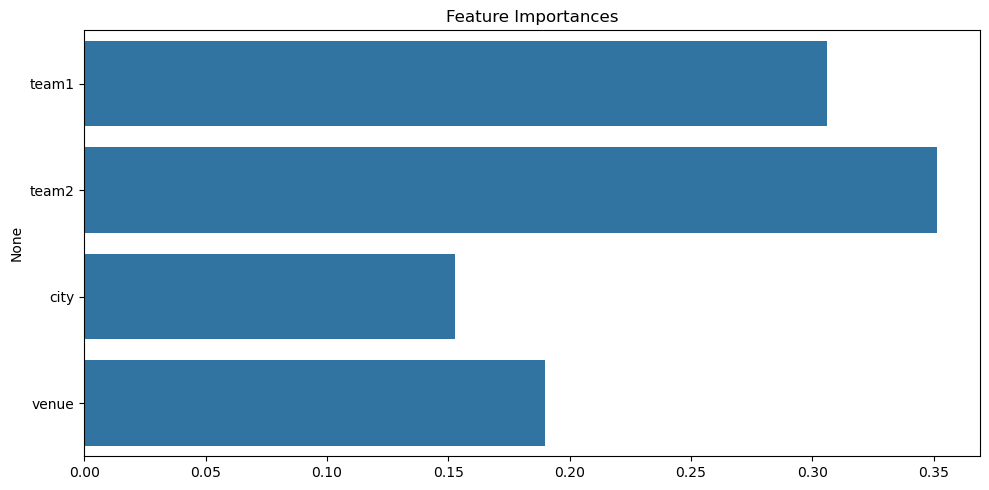

In [26]:
importances = rf.feature_importances_
feat_imp = pd.Series(importances, index=X.columns)
plt.figure(figsize=(10, 5))
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

<Figure size 1000x800 with 0 Axes>

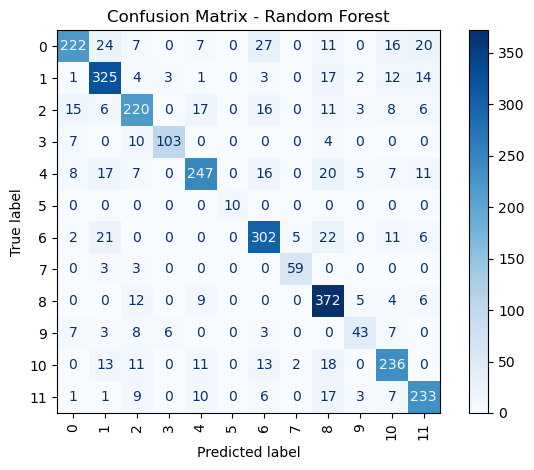

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
plt.figure(figsize=(10, 8))
disp.plot(xticks_rotation=90, cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.grid(False)
plt.tight_layout()
plt.show()


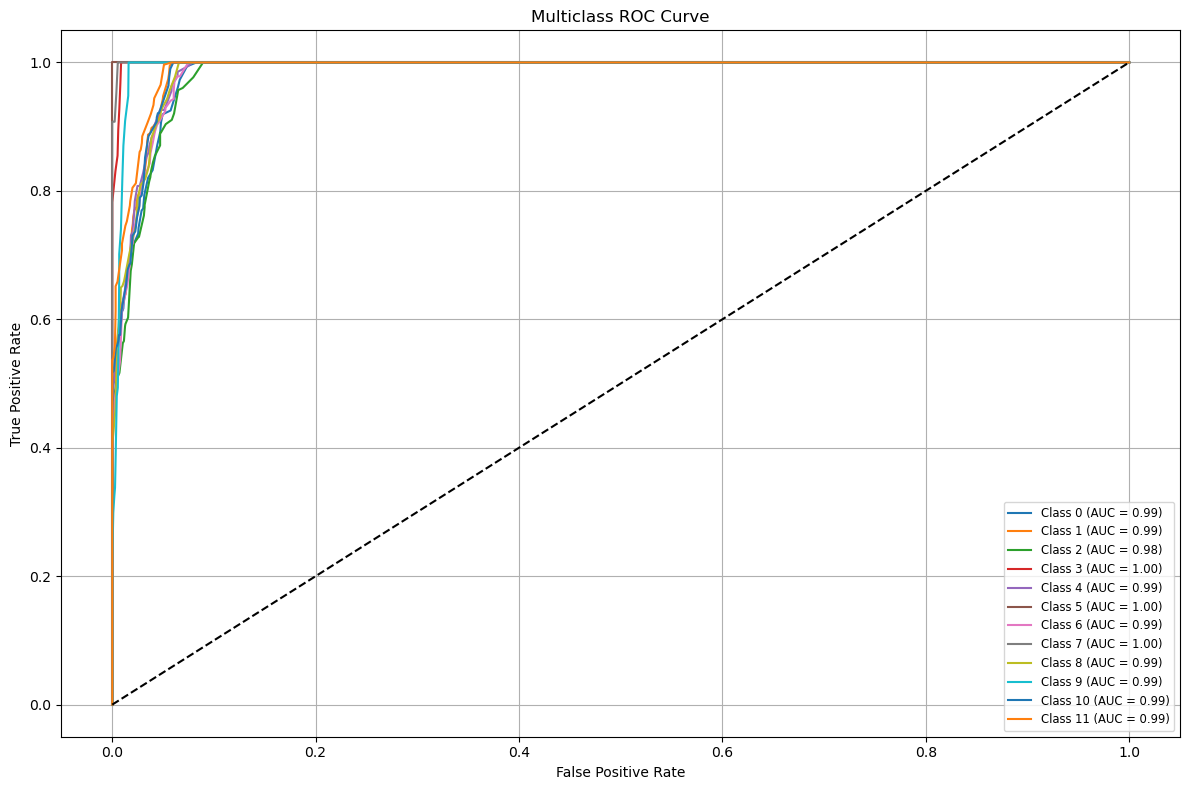

In [28]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import numpy as np

# Binarize target for multiclass ROC
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_score = rf.predict_proba(X_test)

fpr = {}
tpr = {}
roc_auc = {}

plt.figure(figsize=(12, 8))
for i in range(len(np.unique(y_test))):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.title("Multiclass ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right", fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()


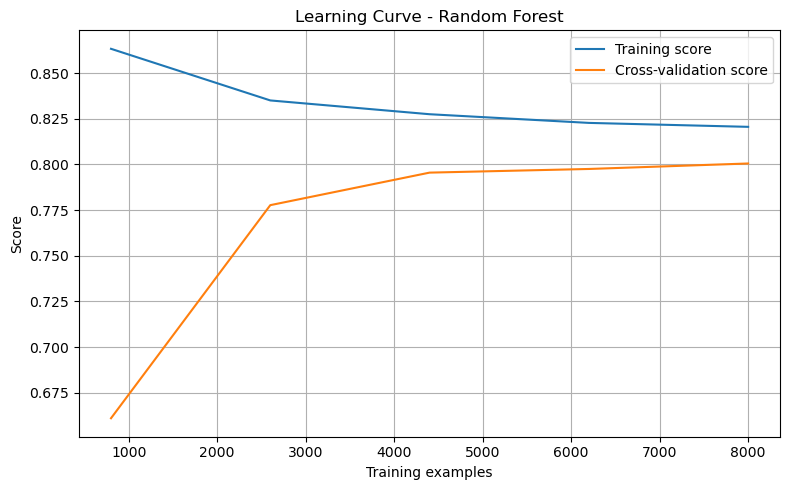

In [29]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    rf, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5)
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_scores_mean, label="Training score")
plt.plot(train_sizes, test_scores_mean, label="Cross-validation score")
plt.title("Learning Curve - Random Forest")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()
plt.show()


In [30]:
from sklearn.metrics import accuracy_score, classification_report

print("Model Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Model Accuracy: 79.07%

Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.66      0.74       334
           1       0.79      0.85      0.82       382
           2       0.76      0.73      0.74       302
           3       0.92      0.83      0.87       124
           4       0.82      0.73      0.77       338
           5       1.00      1.00      1.00        10
           6       0.78      0.82      0.80       369
           7       0.89      0.91      0.90        65
           8       0.76      0.91      0.83       408
           9       0.70      0.56      0.62        77
          10       0.77      0.78      0.77       304
          11       0.79      0.81      0.80       287

    accuracy                           0.79      3000
   macro avg       0.82      0.80      0.81      3000
weighted avg       0.79      0.79      0.79      3000



In [31]:
# Step 2: Keep only selected columns
columns_to_keep = ["winner", "team1", "team2", "city", "venue"]
df_filtered = df[columns_to_keep]

# Step 3: Drop rows with missing values
df_filtered = df_filtered.dropna()

# ✅ Step 4: Use the full dataset (no sampling)
df_sampled_all = df_filtered.copy()  # renamed for compatibility if reused elsewhere


In [42]:
features = ["team1", "team2", "city", "venue"]
target = "winner"
df_model = df_sampled_all[features + [target]].dropna()

# Label Encoding
label_encoders = {}
for col in features + [target]:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    label_encoders[col] = le

X = df_model[features]
y = df_model[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.8027

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.75      0.79      1116
           1       0.79      0.84      0.81      1307
           2       0.82      0.72      0.77      1011
           3       0.97      0.85      0.91       395
           4       0.81      0.78      0.79      1086
           5       1.00      1.00      1.00        43
           6       0.81      0.83      0.82      1216
           7       0.92      0.95      0.94       247
           8       0.78      0.86      0.82      1363
           9       0.66      0.73      0.69       227
          10       0.75      0.78      0.77      1027
          11       0.80      0.79      0.79       962

    accuracy                           0.80     10000
   macro avg       0.83      0.82      0.82     10000
weighted avg       0.80      0.80      0.80     10000



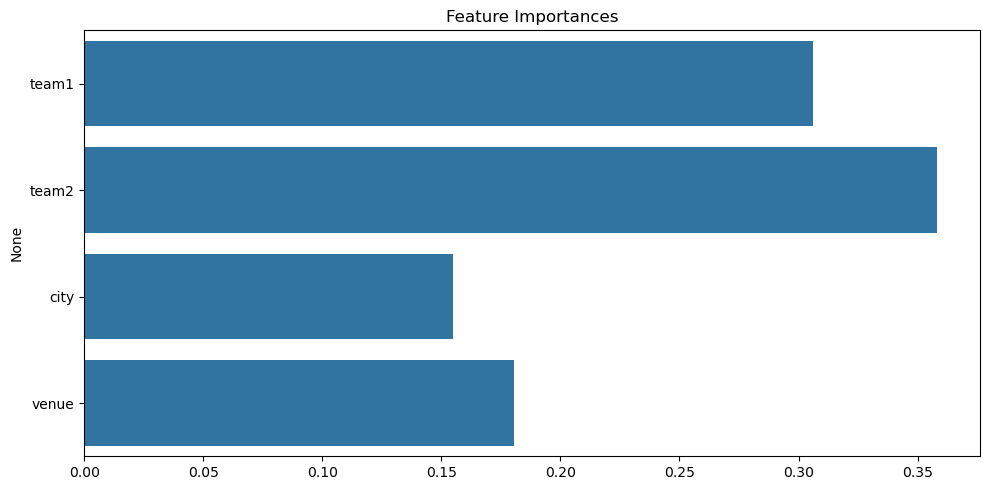

In [39]:
importances = rf.feature_importances_
feat_imp = pd.Series(importances, index=X.columns)
plt.figure(figsize=(10, 5))
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

#### TEST from other notebook do not run this cell just for backup

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define your model
rf = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10,None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search to your training data
grid_search.fit(X_train, y_train)

# Display best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy from CV:", grid_search.best_score_)

# Optionally retrain model with best parameters
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)
y_pred = best_rf.predict(X_test)

# Evaluate
print("\n Classification Report:")
print(classification_report(y_test, y_pred))
